In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [3]:
data = pd.read_csv('heart.csv')

In [4]:
X = data.drop("target" , axis=1)
#independent variable

y = data.pop("target")

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=0)

In [6]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [7]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [8]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(175.246875, 207.55636363636364, 'X[2] <= 0.5\ngini = 0.496\nsamples = 303\nvalue = [138, 165]'),
 Text(94.1625, 187.7890909090909, 'X[11] <= 0.5\ngini = 0.397\nsamples = 143\nvalue = [104, 39]'),
 Text(59.785714285714285, 168.0218181818182, 'X[12] <= 2.5\ngini = 0.499\nsamples = 65\nvalue = [31, 34]'),
 Text(29.892857142857142, 148.25454545454545, 'X[8] <= 0.5\ngini = 0.361\nsamples = 38\nvalue = [9, 29]'),
 Text(11.957142857142857, 128.48727272727274, 'X[7] <= 96.5\ngini = 0.153\nsamples = 24\nvalue = [2, 22]'),
 Text(5.978571428571429, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(17.935714285714287, 108.72, 'X[4] <= 316.5\ngini = 0.083\nsamples = 23\nvalue = [1, 22]'),
 Text(11.957142857142857, 88.95272727272729, 'gini = 0.0\nsamples = 21\nvalue = [0, 21]'),
 Text(23.914285714285715, 88.95272727272729, 'X[3] <= 135.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(17.935714285714287, 69.18545454545455, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(29.89285714

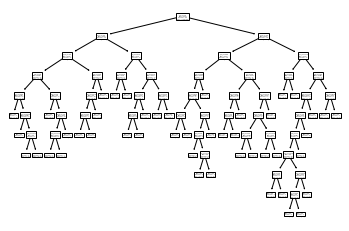

In [9]:
tree.plot_tree(clf) 


In [10]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

               Imp
age       0.080607
sex       0.054394
cp        0.258870
trestbps  0.036861
chol      0.057915
fbs       0.028669
restecg   0.013032
thalach   0.069695
exang     0.020774
oldpeak   0.131152
slope     0.048749
ca        0.124819
thal      0.074463


In [11]:
dt_model.feature_importances_

array([0.0806071 , 0.05439406, 0.2588702 , 0.03686054, 0.05791504,
       0.02866931, 0.01303151, 0.06969483, 0.02077385, 0.13115204,
       0.04874881, 0.12481925, 0.07446346])

In [12]:
y_predict = dt_model.predict(X_test)

In [13]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 7,random_state=0)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=7, random_state=0)

In [14]:
from sklearn.tree import export_graphviz

In [22]:
train_char_label = ['No', 'Yes']
heart_regularized = open('heart_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= heart_regularized , feature_names = list(X_train),class_names = list(train_char_label))

heart_regularized.close()

pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns)

,Imp
age,0.056346
sex,0.056416
cp,0.268492
trestbps,0.028319
chol,0.069979
fbs,0.029735
restecg,0.013516
thalach,0.049158
exang,0.021546
oldpeak,0.149242


In [23]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [24]:
import matplotlib.pyplot as plt

#### AUC and ROC for the training data

AUC: 0.999


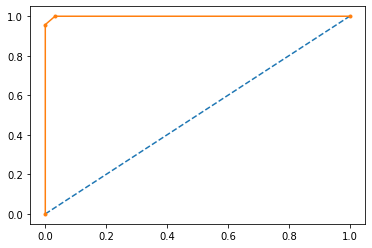

In [25]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#### AUC and ROC for the test data

AUC: 0.758


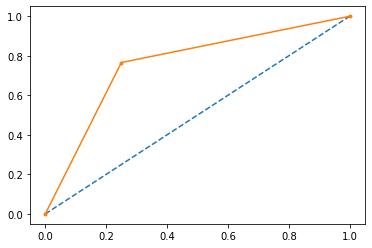

In [26]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [27]:
from sklearn.metrics import classification_report,confusion_matrix

In [28]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        94
           1       0.98      1.00      0.99       118

    accuracy                           0.99       212
   macro avg       0.99      0.98      0.99       212
weighted avg       0.99      0.99      0.99       212



In [29]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        44
           1       0.77      0.77      0.77        47

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91



In [30]:
confusion_matrix(train_labels, ytrain_predict)

array([[ 91,   3],
       [  0, 118]], dtype=int64)

In [31]:
confusion_matrix(test_labels, ytest_predict)

array([[33, 11],
       [11, 36]], dtype=int64)

In [32]:
reg_dt_model.score(X_train,train_labels)

0.9858490566037735

In [33]:
reg_dt_model.score(X_test,test_labels)

0.7582417582417582